Problem 1:
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 464
Mumbai 406
New Delhi 268
Gurgaon 199
Noida 56


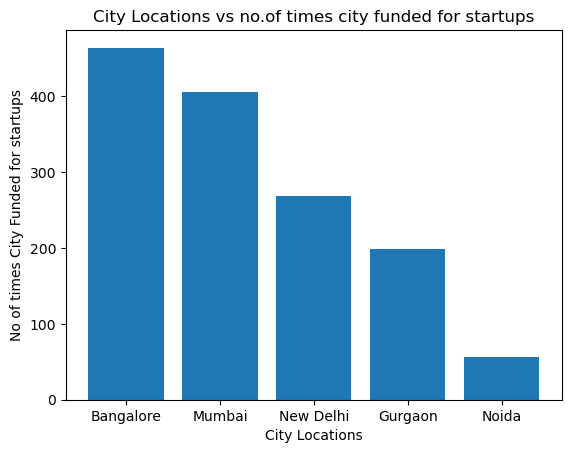

In [1]:
### Importing Pandas Numpy and matplotlib Libraries

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv",encoding = 'utf-8')
df.dropna(subset=['City  Location','Startup Name','Amount in USD'],inplace=True)

### seperating names of the cities by the "/" Seperator

def seperate_city(city):
    if city!="":
        return city.split("/")[0].strip()
df['City  Location']=df['City  Location'].apply(seperate_city)

## Correcting city names 
df['City  Location'].replace('Delhi','New Delhi',inplace=True)
df['City  Location'].replace('bangalore','Bangalore',inplace=True)

#Removing Undisclosed values from the 'Amount in USD' column

df=df[df['Amount in USD']!="undisclosed"]
df=df[df['Amount in USD']!="unknown"]
df=df[df['Amount in USD']!="Undisclosed"]
df=df[df['Amount in USD']!="N/A"]
df=df[df['Amount in USD']!=""]

#Grouping 'City Locations' and 'Amount in USD columns' to get the no.of times each city got funded for Startups
df=df.groupby('City  Location')['Amount in USD'].count()
df=df.sort_values(ascending=False)[:15]
ind=[]
v=[]
c=0
for i in range(len(df)):
    if c<5:
        #Checking for the Eligible Cities
        if df.index[i]=="Bangalore" or df.index[i]=="Mumbai" or df.index[i]=="Gurgaon" or df.index[i]=="Noida" or df.index[i]=="New Delhi":
        
            print(df.index[i],df.values[i])
            ind.append(df.index[i])
            v.append(df.values[i])
            c=c+1

# Ploting Bar Graph for the detailed analysis
plt.bar(ind,v)
plt.xlabel("City Locations")
plt.ylabel("No of times City Funded for startups")
plt.title("City Locations vs no.of times city funded for startups")
plt.show()

                                              